# Outline

Missing value 에는 3가지 종류가 있다고 한다. <br>
1.Missing Completely at Random (MCAR) <br>
   - 정말 랜덤하게 누락된 케이스<br>
   - 변수의 종류와 상관없이 전체적으로 비슷하게 누락된 데이터입니다.<br>
   - 통계적으로 확인가능한 missing pattern<br>

2.Missing at Random (MAR)<br>
   - Missing Conditionally at Random 이라고도 함<br>
   - 어떤 특정 변수에 관련하여 자료가 누락된 케이스<br>
   - 결측값이 자료 내의 다른 변수와 관련되어 있는 경우<br>
   - ex) 어떤 설문조사에서 일부 대상자가 설문지 반대쪽 면 이 있는 것을 모르고 채우지 않았을 경우<br>

3.Missing not at Random (MNAR)<br>
   - 어떤 특정 변수에 관련하여 자료가 누락된 케이스<br>
   - 결측값이 해당 변수와 연관이 있는 경우<br>
   - ex) 어떤 설문조사에서 일부 질문에 정치적인 성향 등의 이유로 채우지 않았을 경우<br>
   
앞의 두 가지는 결측값을 제거하는 것이 좋습니다. 하지만 MNAR의 경우는 결측값이 있는 데이터를 지운다면? 모델이 편향될 가능성이 커지고,<br>
(예를 들어서 20대 보수 지지자들은 정치성향을 드러내기 꺼려하기떄문에, 설문지를 일부로 채우지 않을 수 있습니다. 이런 missing 데이터를 지운다면 20대 진보 지지자의 데이터만 남을 수 있습니다.)<br> 일반화된 모델을 구하기 어려워질 것입니다. 그렇기 때문에 데이터를 지울 것인가, 다시 채워넣을 것인가는 이런 결측값이 생기는 이유를 고려하여 진행해야 합니다.<br>

# 곁측치를 NA 데이터로 바꾸기

- 0, ? ,Null, 1970-01-01, "공백" 등의 값들로 곁측치가 표시되어있는 경우가 있다. 
- 이런 경우, 곁측치 처리를 위해 모두 NA 값으로 바꾸어주어야 한다.
- 중복된 기록(primary 키. 어떤 레코드가 가질 수 있는 유니크한 키. 학번 등 을 이용해 잡아내자.) 은 삭제하자.
- 철자오류, 단위가 나와있지 않거나 다른값들,
- 거짓정보(이상한 이메일을 기재하는 등. fake 정보들)

# Outlier 제거하기

## Univariate 기반

- continuous 한 데이터의 경우 가끔 outlier 가 끼어있어서, 분석에 방해를 주는 경우가 있다. 이 경우에는 outlier 를 제거해주어야 한다.

In [17]:
from sklearn import datasets
import pandas as pd
boston = datasets.load_boston() # boston data set 을 로드하자.
x = boston.data
y = boston.target
columns = boston.feature_names
#create the dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


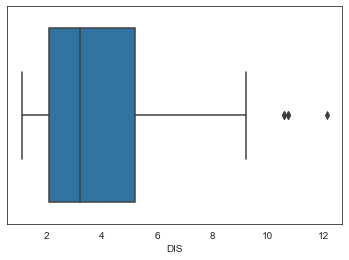

In [18]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

### Z-score

- 데이터가 normal 을 따른다고 가정했을떄에, +- 3 값보다 극단을 가질 확률은 0.0027이다. 즉 매우 희박한 값으로 outlier 라고 판단할 만 하다.
- normal 을 따르지 않는 경우는 달라지지만, 비슷한 분포일 경우에는 outlier 라고 판단 가능할것이다.
- Na 데이터는 무시하고 계산되기 떄문에 곁측치를 NA 데이터로 바꾼 후에 진행하는것이 자연스럽다.

In [19]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df)) # axis 가 0 으로, 즉 col 에대한 z score 계산
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [20]:
np.where(z > 3) # 첫번쨰는 row, 두번쨰는 col 에 대한 outlier 를 포함하고있다.
np.where(z > 3)[0] # outlier 를 포함하는 row

array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64)

In [21]:
boston_df.drop(np.where(z>3)[0],axis=0) # 위에서 ouliter 를 포함하는 값들이 있는 row 를 삭제했다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [22]:
# 특정한 특성(B) 에 대해서만 특이값을 계산해 뺴주고싶다면
z = np.abs(stats.zscore(boston_df['B']))

In [23]:
np.where(z > 3) # 첫번쨰는 row, 두번쨰는 col 에 대한 outlier 를 포함하고있다.
np.where(z > 3)[0] # outlier 를 포함하는 row

array([102, 410, 411, 412, 415, 416, 418, 419, 423, 424, 425, 426, 427,
       429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
      dtype=int64)

In [24]:
boston_df.drop(np.where(z>3)[0],axis=0) # 위에서 ouliter 를 포함하는 값들이 있는 row 를 삭제했다.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### IQR

IQR = 1분위 - 3분위값 

In [34]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [36]:
boston_df_out = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) | (boston_df> (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_out.shape

(274, 13)

## 산점도 기반 (x,y)

In [30]:
from seaborn import load_dataset
df=load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


2차원적으로 산점도를 확인할 수 도 있다. (한 축은 y, 한 축은 x 의 특성중 하나로)

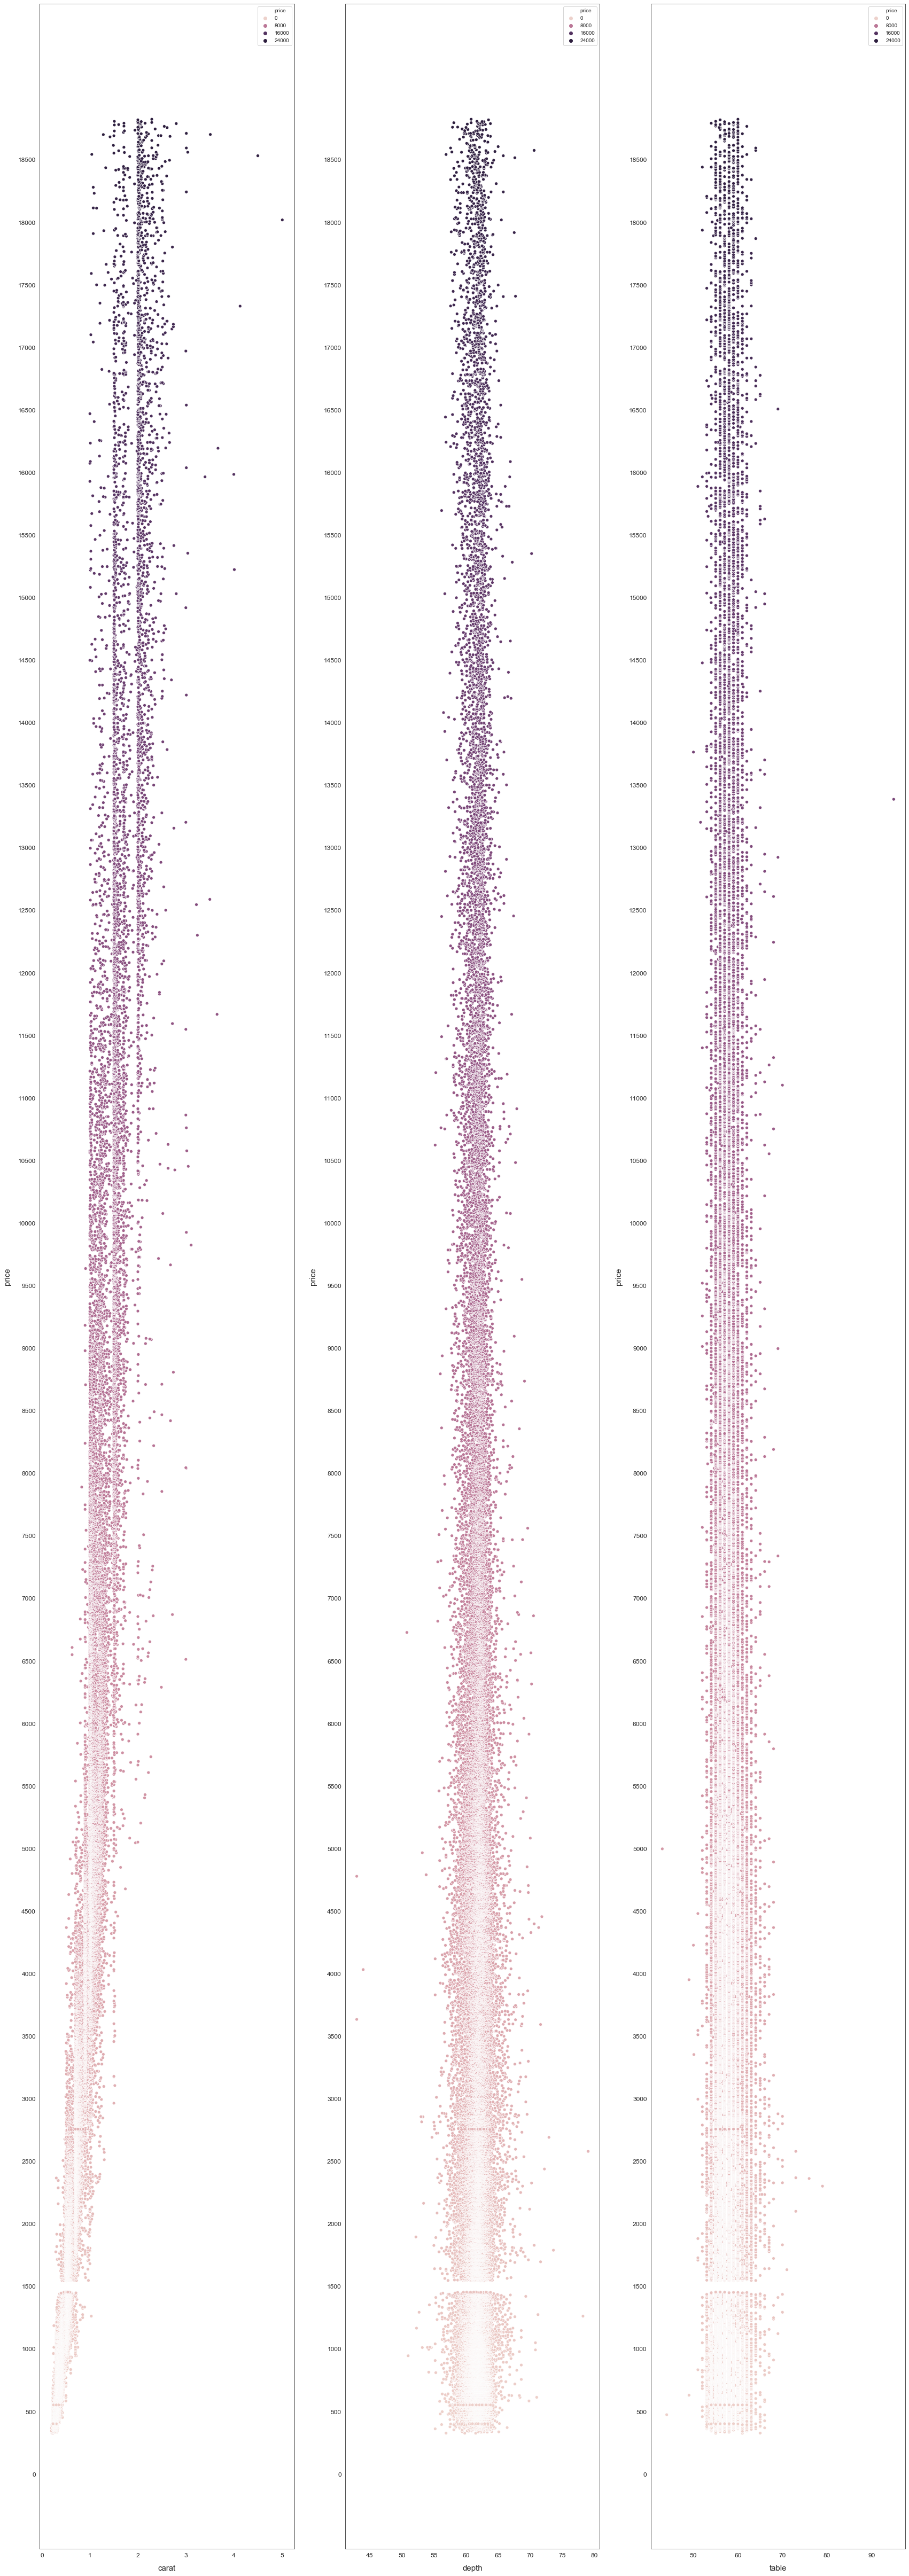

In [38]:
# Finding numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        if i in ['x','y','z','price']: # numeric 타입의 x 특성중 굳이 outlier 를 보고싶지 않은경우 (ordinal 이라던가 그런경우는 보고싶지 않을것이다.)
            pass
        else:
            numeric.append(i)     
# visualising some more outliers in the data values
fig, axs = plt.subplots(ncols=2, nrows=0, figsize=(12, 120))
plt.subplots_adjust(right=2,top=2) # right = 2 , top = 2 로 두어서 각 subplot 의그래프를 크게 (즉 2*2 4개 그래프가 들어갈 자리를 혼자차지) 그리자.
sns.color_palette("husl", 8)
for i, feature in enumerate(list(numeric), 1): # enumerate 가 1 부터 시작한다. 
    plt.subplot(len(list(numeric)), 3, i) # subplot 을 그린다 row 의 수는 그냥 len 으로 대체,
    sns.scatterplot(x=feature, y='price', hue='price', data=df) # hue 에다가 SalePrice 를 넣어서 색을 구분하게 하였다.
    plt.xlabel('{}'.format(feature), size=15,labelpad=12.5)
    plt.ylabel('price', size=15, labelpad=12.5)
    
    plt.tick_params(axis='x', labelsize=12) # x 축의 글자 크기설정
    plt.tick_params(axis='y', labelsize=12) # y 축의 글자 크기설정
    
    y_range = np.arange(0 , max(df['price'])+100,500) # 500 의 차이로 나누기개로 나누기
    plt.yticks(y_range) ;

    plt.legend(loc='best', prop={'size': 10}) # legend 만들기
        
plt.show()

In [39]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [42]:
# Remove outliers
df.drop(df[(13000 < df['price']) & (df['price'] < 14000)
            & (90 < df['table']) & (df['table'] < 110)].index, inplace=True)
df.reset_index(drop=True, inplace=True) # df 의 index 를 reset 한다.
# drop True : 인덱스 열을 보통의 자료열로 올리는 것이 아니라 그냥 버리게 된다.

In [43]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53935,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53936,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53937,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# NA 데이터 살펴보기

이 절에서는 데이터를 본격적으로 분석하기 이전에 다음과 같은 패키지를 사용하여 기초적인 전처리(preprocessing)를 하는 방법을 설명한다. 

* missingno 패키지: 결측 데이터 검색
* sklearn.impute 패키지: 결측 데이터 대체

In [2]:
from io import StringIO
import pandas as pd
import numpy as np
csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


## 전체 데이터에 대해 NaN 갯수 알아보기

In [3]:
df.isnull().sum().sum()

9

## 각 col 에 대해서 NaN 갯수 알아보기

In [4]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

## 각 col 에 대해서 NaN 갯수 비율 알아보기

In [5]:
df.isnull().sum()/df.shape[0]

x1    0.222222
x2    0.333333
x3    0.333333
x4    0.111111
x5    0.000000
dtype: float64

In [6]:
# data 에 대한 missing 비율 알아보기
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(df) # df 에 넣는것을 우리가 정의한 data
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('x2', 33.33), ('x3', 33.33), ('x1', 22.22), ('x4', 11.11), ('x5', 0.0)]

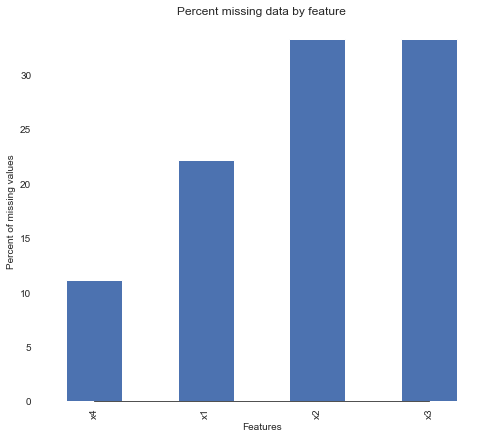

In [15]:
# Missing data 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(df.isnull().mean()*100,2) # 여기 df 에다가 데이터를 넣어주면 된다.
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

## missingno 패키지 (시각화)

현실에서 데이터를 수집하다보면 데이터의 일부를 얻지 못하거나 누락되는 결측(missing) 데이터가 생긴다. missingno 패키지는 pandas 데이터프레임에서 결측 데이터를 찾는 기능을 제공한다. 이 패키지를 사용하려면 데이터프레임에 결측 데이터가 `NaN`(not a number) 값으로 저장되어 있어야 한다. 

주의할 점은 `NaN`값은 부동소수점 실수 자료형에만 있는 값이므로 정수 자료를 데이터프레임에 넣을 때는 `Int64Dtype` 자료형을 명시해주어야 하고 시간 자료형을 넣을 때도 `parse_dates` 인수로 날짜시간형 파싱을 해주어야 `datetime64[ns]` 자료형이 되어 결측 데이터가 `NaT`(not a time) 값으로 표시된다.

판다스 데이터프레임 자체도 `isnull()` 또는 `isna()` 메서드로 사용하면 결측 데이터의 위치를 알아내는 것이 가능하다. 

하지만 missingno 패키지를 사용하면 대규모의 데이터에서도 결측 데이터에 대한 시각화를 쉽게 할 수 있다. `matrix()` 함수는 결측 데이터를 시각화하는 명령이다. 결측된 데이터는 흰색으로, 그렇지 않은 데이터는 검은색으로 나타난다. 가장 오른쪽에 있는 것은 스파크라인(spark line)이라고 부르고, 각 행의 데이터 완성도를 표현한다.

### col 별 NaN 갯수 시각화

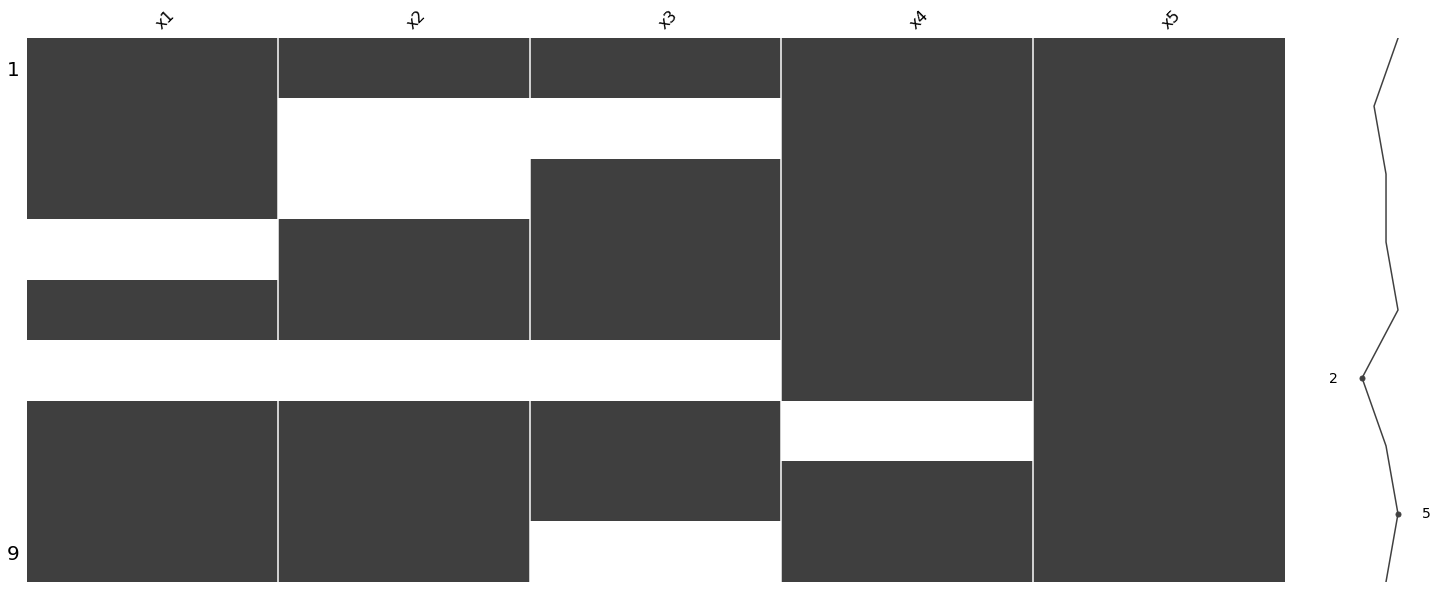

In [41]:
import missingno as msno
from matplotlib import pyplot as plt
msno.matrix(df)
plt.show()

만약 각 열에 결측 데이터가 얼마나 존재하는지 시각화 하고 싶다면, `bar()` 함수를 사용한다.

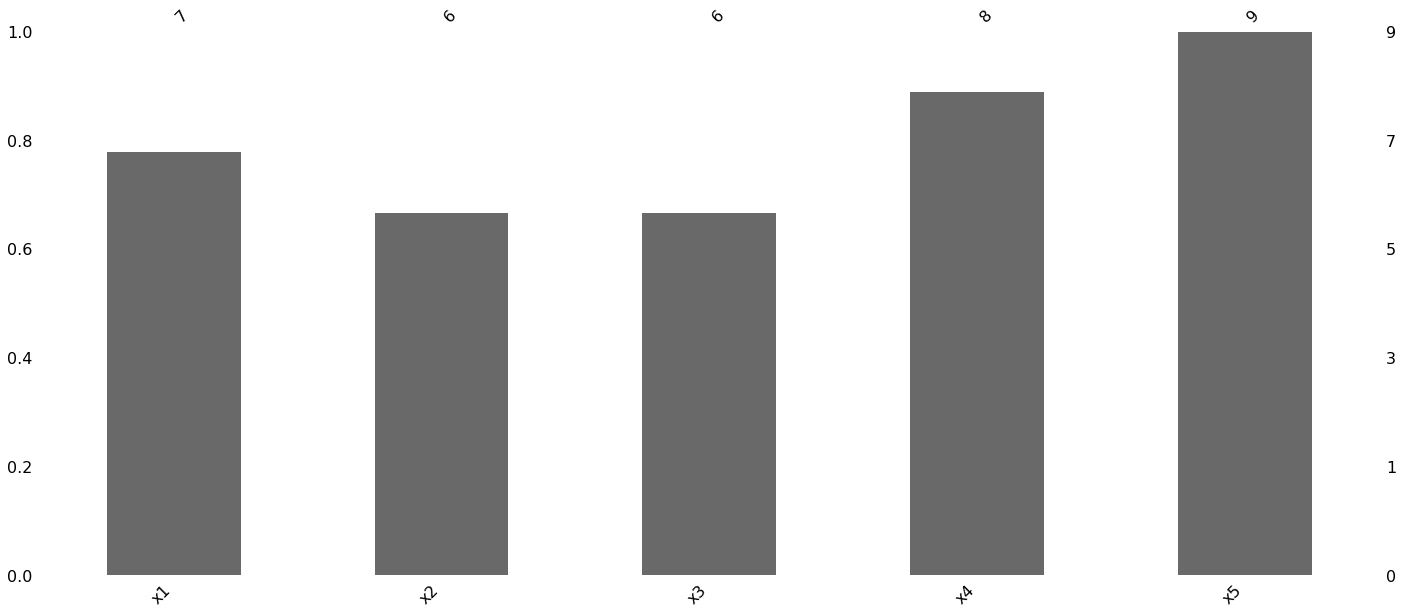

In [42]:
msno.bar(df)
plt.show()
# 허연게 다 결측 데이터이다.

대규모 데이터에서 missingno 패키지가 어떻게 쓰일 수 있는지 살펴보기 위해 타이나닉 생존자 데이터를 예로 들어본다. 타이타닉 생존자 데이터는 seaborn 패키지에서 제공하는 예제 데이터다. 

In [43]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


각 열이 의미하는 바는 다음과 같다.

* survived : 생존 여부
* pclass : 승객의 클래스
* sex : 성별. male, female로 표기
* sibsp : 형제 혹은 자매의 수
* parch : 부모 혹은 자녀의 수
* fare : 탑승 요금
* embarked : 출발지의 고유 이니셜
* class : 선실의 클래스
* who : male, female을 man, woman으로 표기
* adult_male : 성인 남성 인지 아닌지 여부
* deck : 선실 고유 번호의 가장 앞자리 알파벳(A ~ G)
* embark_town : 출발지
* alive : 생존 여부 데이터를 yes 혹은 no로 표기
* alone : 가족이 없는 경우 True

missingno를 이용하여 타이타닉 데이터를 살펴보면 age, deck, embarkd, embark_town 열 등에 결측 데이터가 있는 것을 볼 수 있다.

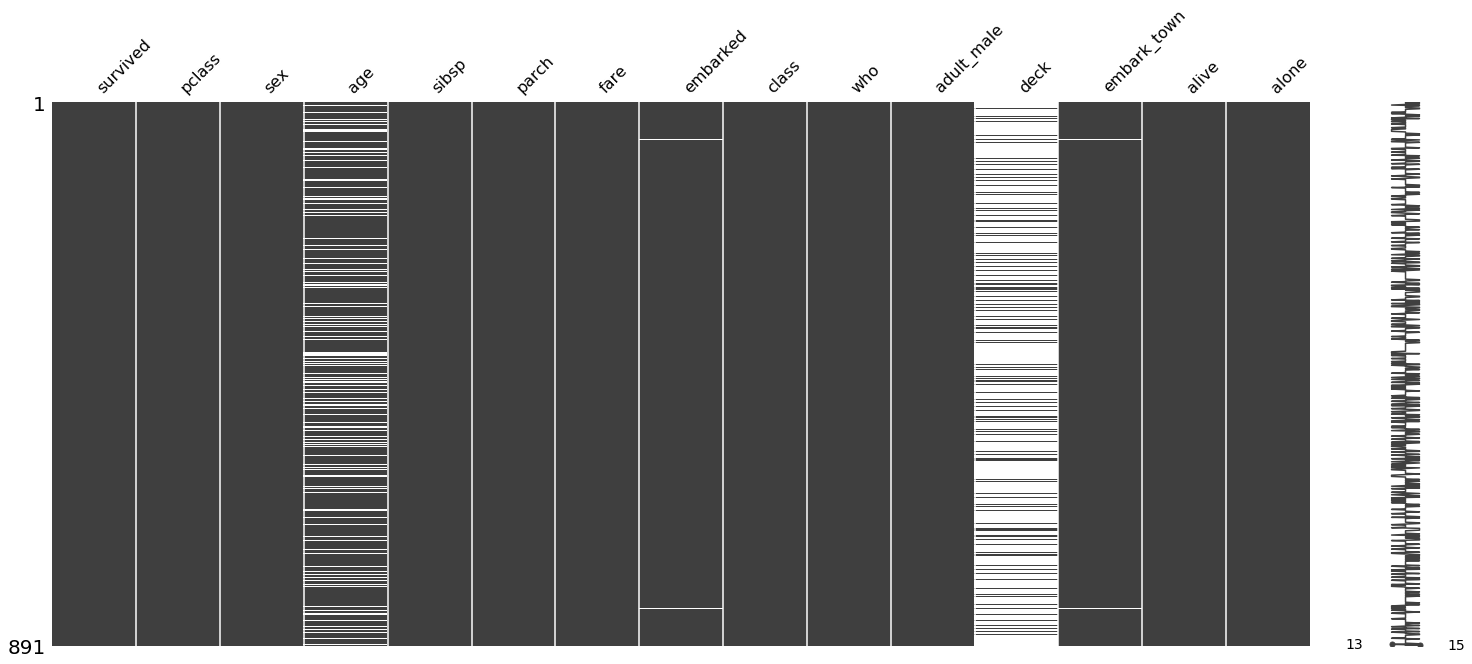

In [44]:
msno.matrix(titanic)
plt.show()

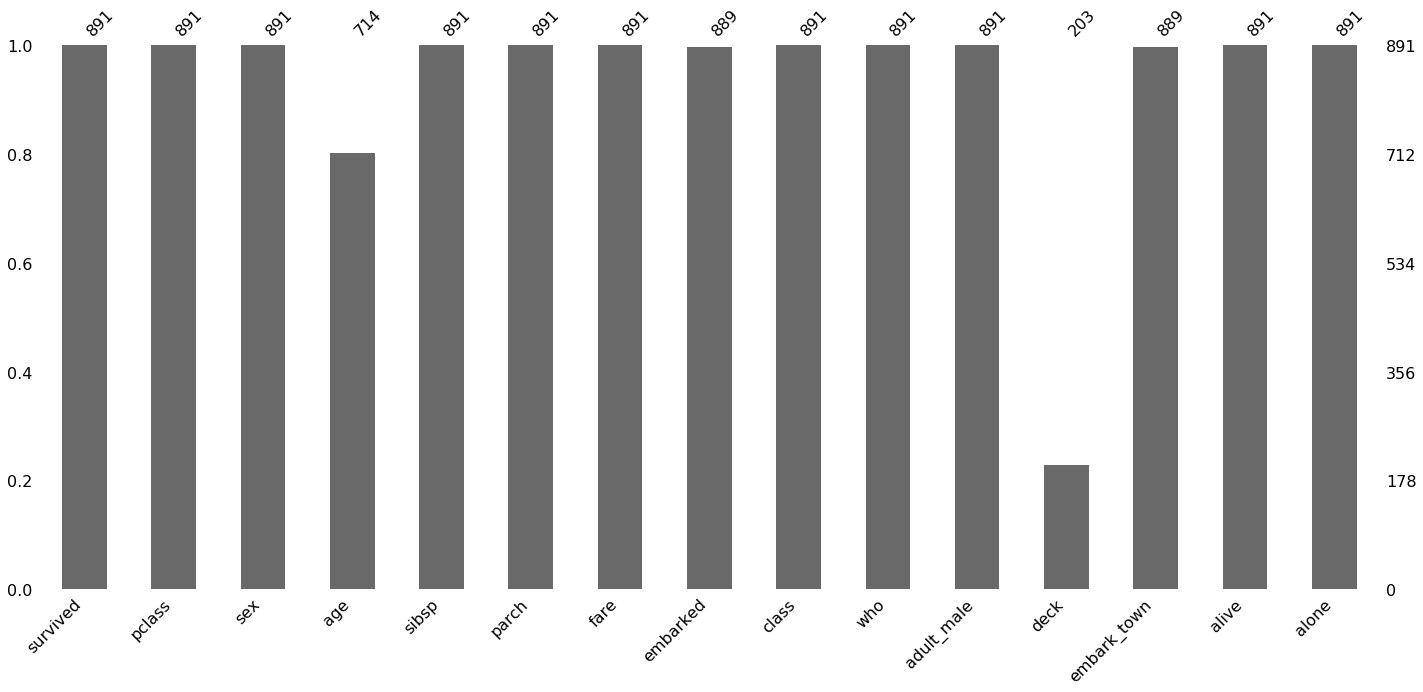

In [45]:
msno.bar(titanic)
plt.show()

# NaN 데이터 Handling

결측된 데이터를 처리하는 방법은 두 가지다.

* 결측된 데이터가 너무 많은 경우 해당 데이터 열 전체를 삭제할 수 있다.
* 결측된 데이터가 일부인 경우 가장 그럴듯한 값으로 대체할 수 있다. 이를 **결측 데이터 대체(imputation)**라고 한다.

판다스의 `dropna()` 메서드를 사용하면 결측 데이터가 존재하는 행이나 열을 지울 수 있다. 다음 코드는 위에서 예로 든 df 데이터프레임에서 결측 데이터가 존재하는 모든 행을 지운다.

## Deleting

### Nan 이 포함된 행 지우기

In [46]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


### NaN 이 포함된 col 지우기

`axis` 인수를 1로 설정하면 결측 데이터가 있는 열을 제거한다.

In [47]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


### 특정갯수(비율) 이상의 NaN 데이터가 있을떄 지우기

`thresh` 인수를 사용하면 특정 갯수 이상의 '비'결측 데이터가 있는 행 또는 열만 남긴다.

In [48]:
df.dropna(thresh=7, axis=1)
df.dropna(thresh=df.shape[1]*0.7, axis=0) # col 의 갯수 * 0.7개 이상의 nan 이 있는 데이터는 삭제 (nan 이 많은 쓰레기 데이터라고 판단!)
df.dropna(thresh=df.shape[0]*0.7, axis=1) # row(데이터) 의 갯수 * 0.7 이상의 nan 이 있는 col(특성) 은 삭제. (nan 이 많은 쓰레기 특성이라고 판단.)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


## Imputation

### 최빈값 대체

Pros: <br>
- Works well with categorical features.

Cons: <br>
- It also doesn’t factor the correlations between features.
- It can introduce bias in the data.
- 값이 많은 변수(conti)인 경우 의미가 없다.

이번에는 타이타닉 데이터에서 embark_town 데이터부터 대체해보자. 이 값은 범주값이므로 `strategy="most_frequent"`로 하여 최빈값을 대체값으로 사용한다. 대체하기 전의 embark_town 데이터 분포를 살펴보면 Southhamton 값이 가장 많다. 대체 후에는 이 값으로 결측 데이터가 대체될 것이다.

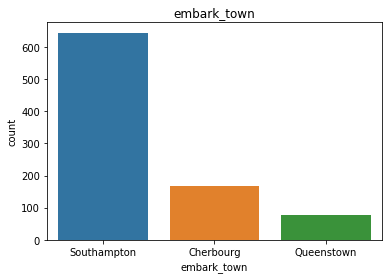

In [49]:
sns.countplot(titanic.embark_town)
plt.title("embark_town") ;
# embark_town 의 분포. 곁측치 대체할때 최빈값으로 대체하는게 좋아보인다.

`SimpleImputer` 클래스로 대체를 한 결과는 다음과 같다. `embarked` 데이터도 사실상 같은 데이터이므로 같이 대체한다.

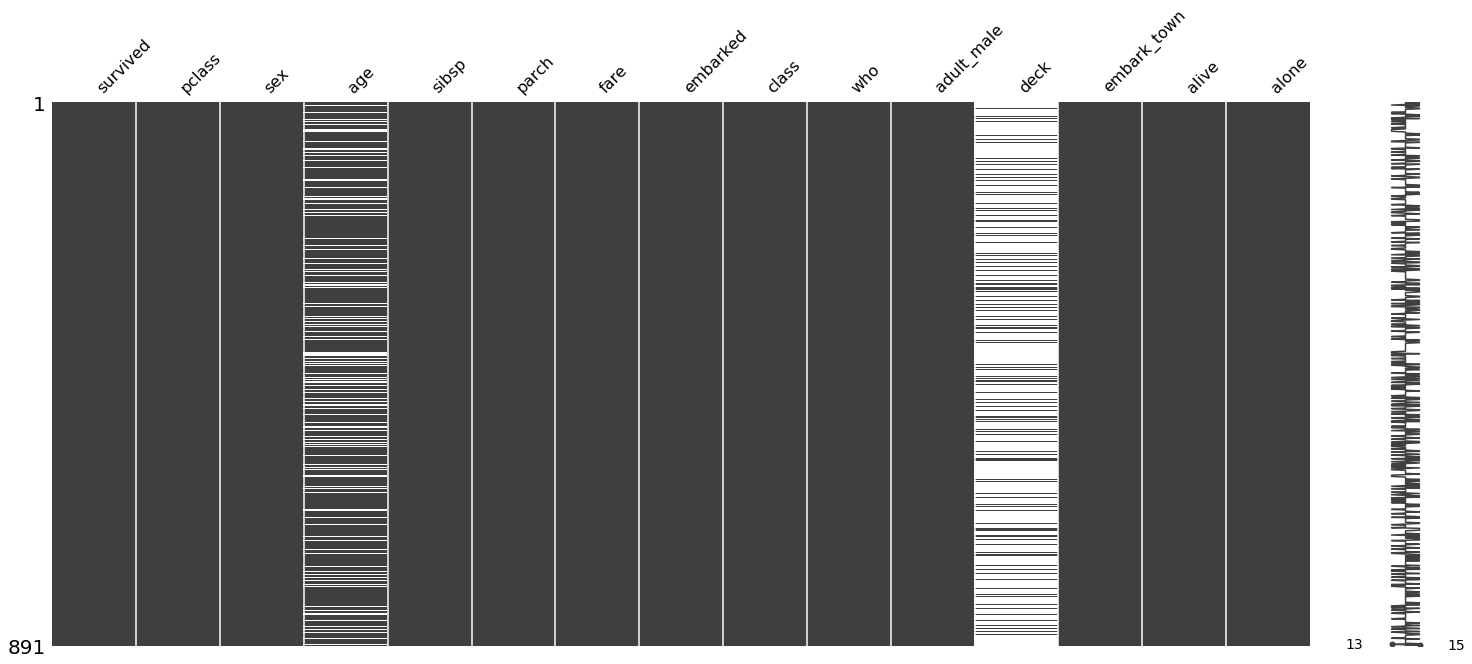

In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent") 
titanic["embark_town"] = imputer.fit_transform(titanic[["embark_town"]])
titanic["embarked"] = imputer.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

### 중앙값 대체

값의 분포가 대칭적이면 평균이 좋고 값의 분포가 심하게 비대칭인 경우에는 중앙값이 적당하다.

다음으로 age 데이터를 대체한다. 대체하기 전의 age 데이터 분포를 살펴보면 비대칭인 것을 볼 수 있다.

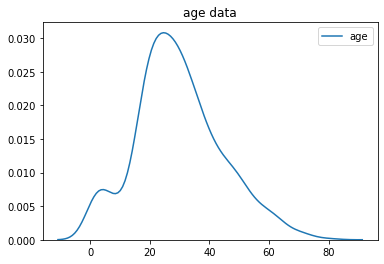

In [51]:
sns.kdeplot(titanic.age)
plt.title("age data")
plt.show()

따라서 `strategy="median"`로 하여 중앙값을 대체값으로 사용한다. 다음 그림에서 결측값이 사라진 것을 확인할 수 있다. 

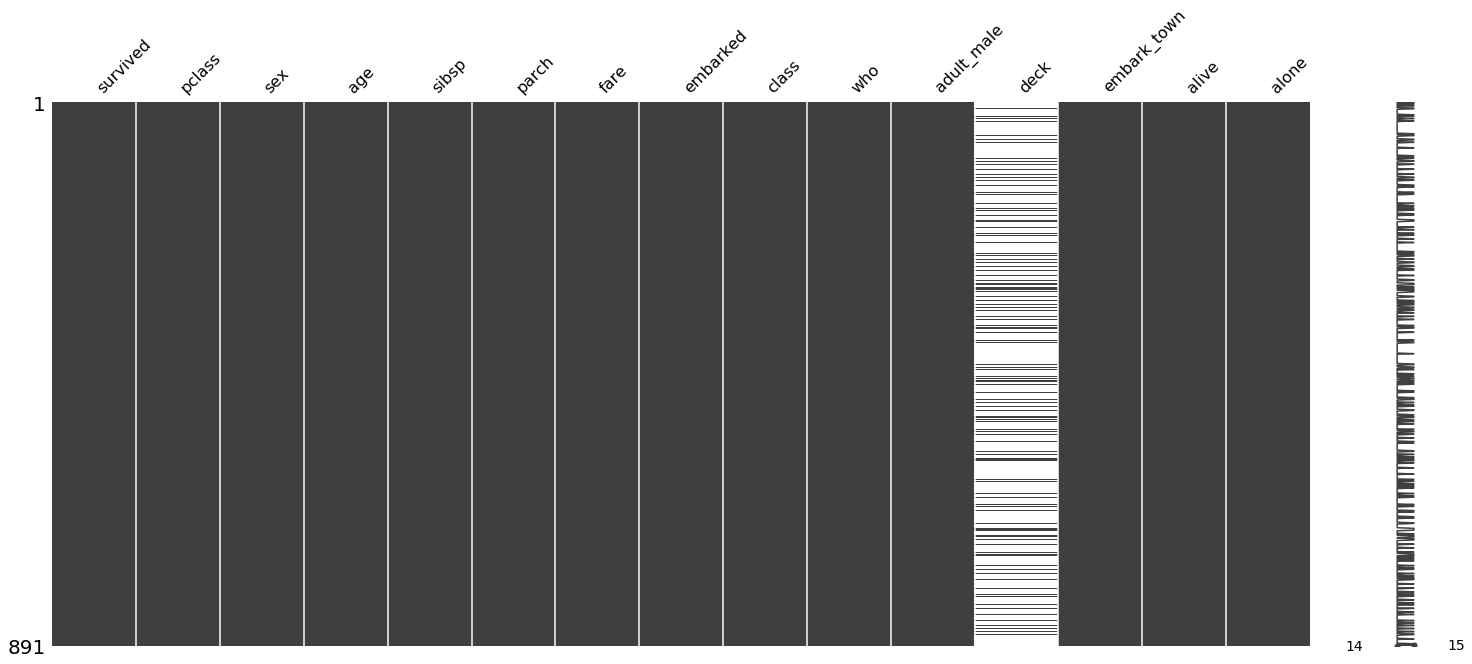

In [52]:
imputer = SimpleImputer(strategy="median")
titanic["age"] = imputer.fit_transform(titanic[["age"]])
msno.matrix(titanic)
plt.show()

### 평균 대체

값의 분포가 대칭적이면 평균이 좋다.

In [53]:
imputer = SimpleImputer(strategy='mean') # 으로 놓고 위와 똑같이

### KNN 대체

ML의 기본적인 알고리즘 중 하나인 KNN을 사용하는 방법도 있습니다. KNN은 본인과 가까운 K개의 데이터를 선택하여, 그 평균을 취하는 방식입니다.

mean, mode 등에 비해 비교적 정확하다는 장점이 있지만, KNN이 가지는 단점을 그대로 가져옵니다.

- 계산량이 많다.
- outlier에 민감하다.
- feature의 scale이 중요하다. (유클리드 or 맨허튼 거리를 기반으로 하기때문에)
- 고차원 데이터에서 매우 부정확할 수 있다.


In [54]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [55]:
titanic = sns.load_dataset("titanic")
titanic[['age']] = imputer.fit_transform(titanic[['age']])

### Mice 대체

mice 는 다중대체법중의 하나이다.<br>
MI도 여러가지 방법이 있지만, 그 중에서 가장 우선이 되는 방법은 multiple imputation by chained equations (MICE) 

다중대체법이란? (Multiple Imputation)<br>
결측값의 불확실성을 보존하면서, 기존의 데이터를 사용하여 결측값을 실제값 (real value)으로 추정된 몇 개의 값 (approximating)으로 만들어 (또는 대체) 내어 분석하는 방법<br>
여러개의 결측치가 대체된 데이터 셋을 생성하여 결측치를 대체 함에 오류를 줄어드는 장점이 있습니다<br>
- MICE is used to impute numeric data only . 즉 categorical 데이터에는 쓸 수 없다.

Imputation으로 인한 노이즈 증가 문제를 해결하기 위한 방법입니다. 단순하게 한 번 Imputation을 진행한 것보다 여러 Imputation을 조합하는 것이 더 좋다는 아이디어입니다. 모든 MI는 3가지 과정을 거칩니다.

- Imputation : distribution을 토대로 m개의 데이터셋을 imputation합니다. 이 과정에서 Markov Chain Monte Carlo (MCMC)를 사용하면 더 나은 결과를 얻을 수 있다고 합니다.<br>
- Analysis : m개의 완성된 데이터셋을 분석합니다.<br>
- Pooling : 평균, 분산, 신뢰 구간을 계산하여 결과를 합칩니다.<br>


In [84]:
boston_df.iloc[np.arange(1,100,22),[1,3,7]] = np.nan

In [85]:
from impyute.imputation.cs import mice
# start the MICE training
# MICE 는 dataframe 을 받을수 없으므로, .values 가 들어가야한다.
imputed_training=mice(boston_df.values)

In [86]:
boston_df=pd.DataFrame(imputed_training,columns=boston_df.columns)

### Datawig

This method works very well with categorical and non-numerical features. It is a library that learns Machine Learning models using Deep Neural Networks to impute missing values in a dataframe. It also supports both CPU and GPU for training.

Pros:<br>
Quite accurate compared to other methods.<br>
It has some functions that can handle categorical data (Feature Encoder).<br>
It supports CPUs and GPUs.<br>
Cons:<br>
Single Column imputation.<br>
Can be quite slow with large datasets.<br>
You have to specify the columns that contain information about the target column that will be imputed.<br>

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(train)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['1','2','3','4','5','6','7', 'target'], # column(s) containing information about the column we want to impute
    output_column= '0', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df_train, num_epochs=50)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

## More

### 연관성이 큰 변수끼리 묶어서! groupby 시킨후에 각각의 평균(중앙값) 으로대체

성별,임금,키 3개의 변수가 있고, 임금에 nan 이 있다고 하자. 그러면 성별별로 임금의 차이가 두드러지게 나타날것이므로 그냥 평균으로 대체하는것은 좋지 않을것이다. 그러므로 성별로 groupby 를 시킨 뒤에, 성별에 따른 평균(중앙) 값으로 임금의 nan을대체하게 되면 좋을것이다!

# Pipeline

In [ ]:
# example of evaluating a model after an imputer transform
from pandas import read_csv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
dataset = read_csv('C:/Users/goran/Desktop/Python/Dataset/pima-indians-diabetes.csv', header=None)
# mark zero values as missing or NaN
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# split dataset into inputs and outputs
values = dataset.values
X = values[:,0:8]
y = values[:,8]
# define the imputer
imputer = SimpleImputer(missing_values=np.nan, # missing value 로 취급할 값. np.nan 이 default
                        strategy='mean')
# define the model
lda = LinearDiscriminantAnalysis() # 모델
# define the modeling pipeline
pipeline = Pipeline(steps=[('imputer', imputer),('model', lda)])
# define the cross validation procedure
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from math import sqrt
import random
import numpy as np
random.seed(0)

#Fetching the dataset
import pandas as pd
dataset = fetch_california_housing()
train, target = pd.DataFrame(dataset.data), pd.DataFrame(dataset.target)
train.columns = ['0','1','2','3','4','5','6','7']
train.insert(loc=len(train.columns), column='target', value=target)

#Randomly replace 40% of the first column with NaN values
column = train['0']
print(column.size)
missing_pct = int(column.size * 0.4)
i = [random.choice(range(column.shape[0])) for _ in range(missing_pct)]
column[i] = np.NaN
print(column.shape[0])

#Impute the values using scikit-learn SimpleImpute Class
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer( strategy='mean') #for median imputation replace 'mean' with 'median'
imp_mean.fit(train)
imputed_train_df = imp_mean.transform(train)


20640
20640


# 